### Import libraires

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Analyse exploratoire des données (EDA)

In [71]:
data = pd.read_csv("data/donnees_nettoyees_retards.csv")
data.head()

,Ville de depart,Ville d'arrivee,Distance (km),Heure depart prevue,Heure arrivee prevue,Heure arrivee reelle,Poids (kg),Retard observe (minutes)
0,1,3,95,2025-09-15 21:00:00,2025-09-15 22:11:15,2025-09-15 22:15:15,38939,4
1,0,2,235,2025-11-20 16:00:00,2025-11-20 18:56:15,2025-11-20 20:20:15,8061,84
2,3,0,570,2025-02-06 17:00:00,2025-02-07 00:07:30,2025-02-07 01:24:30,23900,77
3,2,0,235,2025-02-27 16:00:00,2025-02-27 18:56:15,2025-02-27 19:45:15,38215,49
4,2,0,235,2025-08-18 19:00:00,2025-08-18 21:56:15,2025-08-18 23:43:15,6889,107


In [5]:
data.describe()

,Ville de depart,Ville d'arrivee,Distance (km),Poids (kg),Retard observe (minutes)
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1.996667,2.023333,395.883333,21311.825000,58.971667
std,1.384383,1.455903,214.388644,10670.249236,35.809049
min,0.000000,0.000000,95.000000,2035.000000,0.000000
25%,1.000000,1.000000,240.000000,12246.500000,27.000000
50%,2.000000,2.000000,320.000000,21335.000000,59.500000
75%,3.000000,3.000000,555.000000,30631.500000,90.250000
max,4.000000,4.000000,865.000000,39944.000000,120.000000


In [6]:
print(data.dtypes)

Ville de depart              int64
Ville d'arrivee              int64
Distance (km)                int64
Heure depart prevue         object
Heure arrivee prevue        object
Heure arrivee reelle        object
Poids (kg)                   int64
Retard observe (minutes)     int64
dtype: object


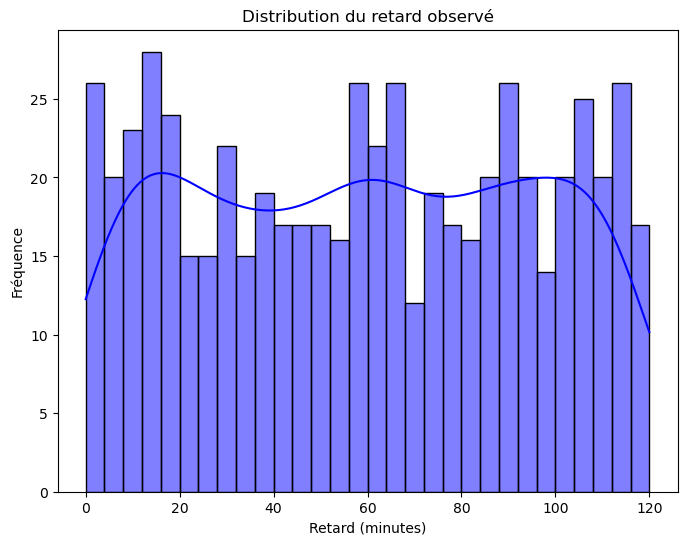

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Retard observe (minutes)"], kde=True, bins=30, color='blue')
plt.title("Distribution du retard observé")
plt.xlabel("Retard (minutes)")
plt.ylabel("Fréquence")
plt.show()


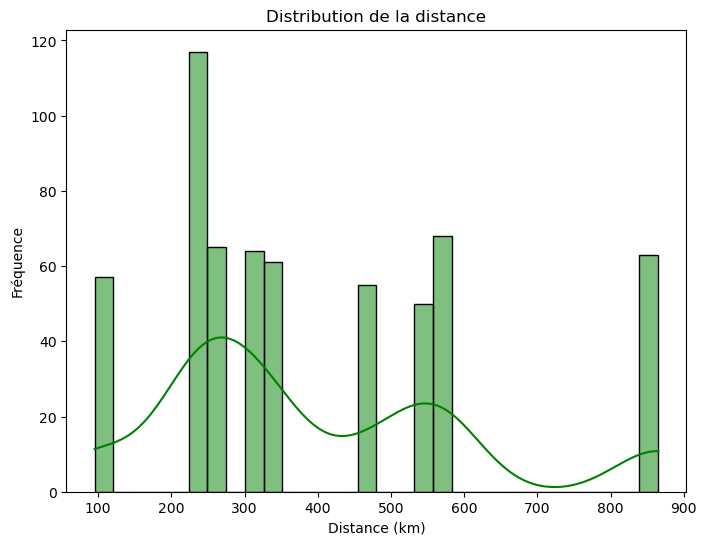

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Distance (km)"], kde=True, bins=30, color='green')
plt.title("Distribution de la distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fréquence")
plt.show()

In [13]:
# Remplacer les valeurs aberrantes par la médiane des distances
median_distance = data["Distance (km)"].median()
data["Distance (km)"] = data["Distance (km)"].replace(865, median_distance)

data.head()

,Ville de depart,Ville d'arrivee,Distance (km),Heure depart prevue,Heure arrivee prevue,Heure arrivee reelle,Poids (kg),Retard observe (minutes)
0,1,3,95,2025-09-15 21:00:00,2025-09-15 22:11:15,2025-09-15 22:15:15,38939,4
1,0,2,235,2025-11-20 16:00:00,2025-11-20 18:56:15,2025-11-20 20:20:15,8061,84
2,3,0,570,2025-02-06 17:00:00,2025-02-07 00:07:30,2025-02-07 01:24:30,23900,77
3,2,0,235,2025-02-27 16:00:00,2025-02-27 18:56:15,2025-02-27 19:45:15,38215,49
4,2,0,235,2025-08-18 19:00:00,2025-08-18 21:56:15,2025-08-18 23:43:15,6889,107


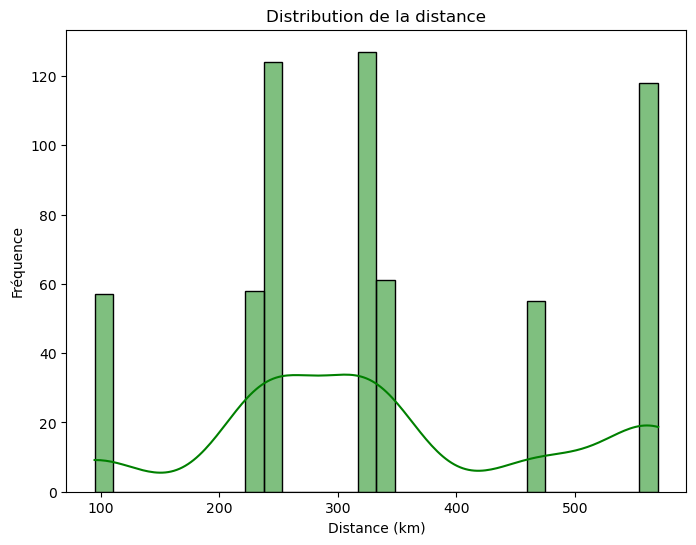

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Distance (km)"], kde=True, bins=30, color='green')
plt.title("Distribution de la distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fréquence")
plt.show()

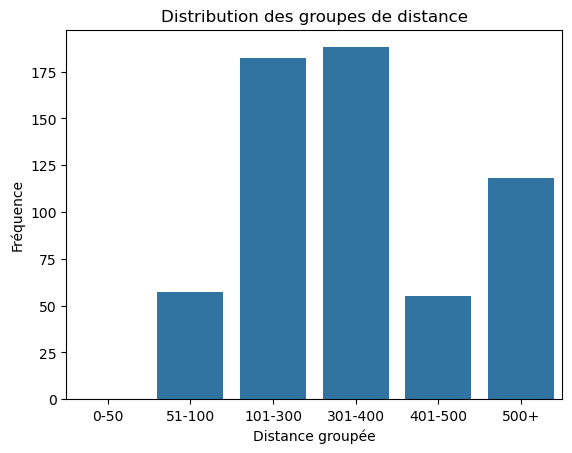

In [18]:
bins = [0, 50, 100, 300, 400, 500, 1000]
labels = ["0-50", "51-100", "101-300", "301-400", "401-500", "500+"]
data["Distance_group"] = pd.cut(data["Distance (km)"], bins=bins, labels=labels)

sns.countplot(x="Distance_group", data=data)
plt.title("Distribution des groupes de distance")
plt.xlabel("Distance groupée")
plt.ylabel("Fréquence")
plt.show()


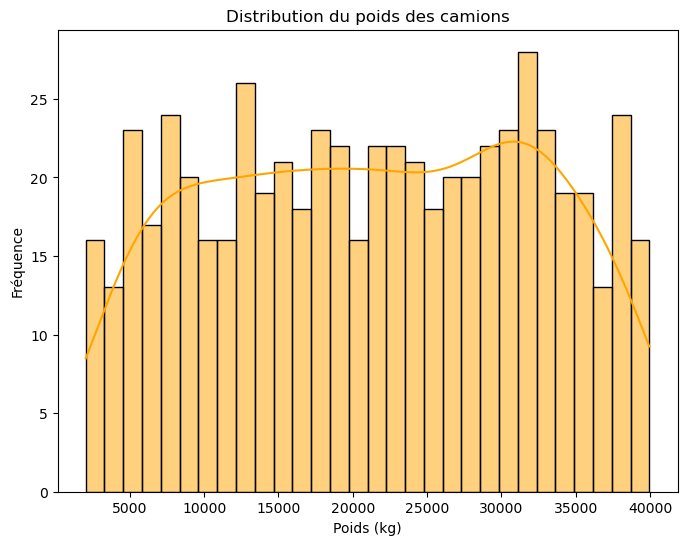

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Poids (kg)"], kde=True, bins=30, color='orange')
plt.title("Distribution du poids des camions")
plt.xlabel("Poids (kg)")
plt.ylabel("Fréquence")
plt.show()


In [21]:
data["Heure depart prevue"] = pd.to_datetime(data["Heure depart prevue"])
data["Heure arrivee prevue"] = pd.to_datetime(data["Heure arrivee prevue"])
data["Heure arrivee reelle"] = pd.to_datetime(data["Heure arrivee reelle"])

data["Duree reelle (minutes)"] = ((data["Heure arrivee reelle"] - data["Heure depart prevue"]).dt.total_seconds() / 60).astype(int)
data.head()

,Ville de depart,Ville d'arrivee,Distance (km),Heure depart prevue,Heure arrivee prevue,Heure arrivee reelle,Poids (kg),Retard observe (minutes),Distance_group,Duree reelle (minutes)
0,1,3,95,2025-09-15 21:00:00,2025-09-15 22:11:15,2025-09-15 22:15:15,38939,4,51-100,75
1,0,2,235,2025-11-20 16:00:00,2025-11-20 18:56:15,2025-11-20 20:20:15,8061,84,101-300,260
2,3,0,570,2025-02-06 17:00:00,2025-02-07 00:07:30,2025-02-07 01:24:30,23900,77,500+,504
3,2,0,235,2025-02-27 16:00:00,2025-02-27 18:56:15,2025-02-27 19:45:15,38215,49,101-300,225
4,2,0,235,2025-08-18 19:00:00,2025-08-18 21:56:15,2025-08-18 23:43:15,6889,107,101-300,283


In [22]:
print(data.columns)

Index(['Ville de depart', 'Ville d'arrivee', 'Distance (km)',
       'Heure depart prevue', 'Heure arrivee prevue', 'Heure arrivee reelle',
       'Poids (kg)', 'Retard observe (minutes)', 'Distance_group',
       'Duree reelle (minutes)'],
      dtype='object')


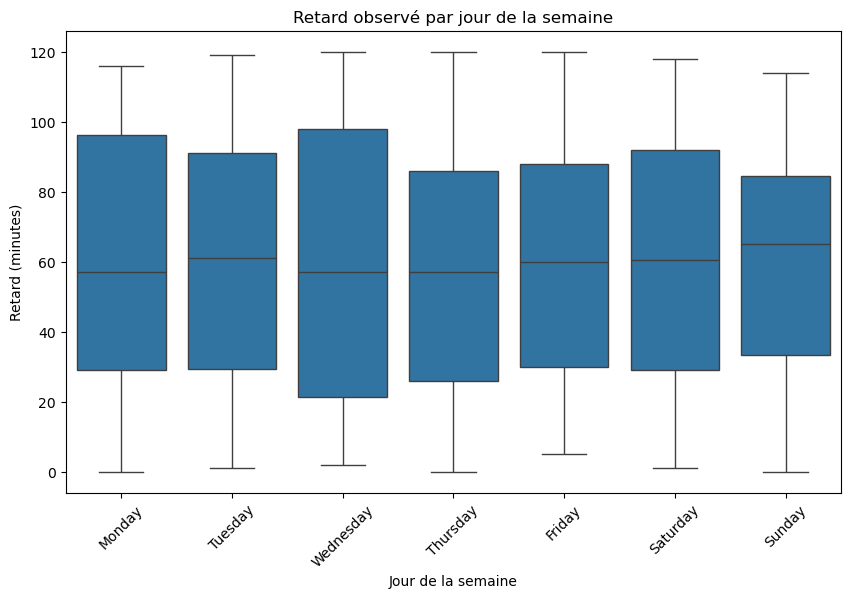

In [24]:
data["Jour de la semaine"] = pd.to_datetime(data["Heure depart prevue"]).dt.day_name()
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Jour de la semaine", y="Retard observe (minutes)", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Retard observé par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Retard (minutes)")
plt.xticks(rotation=45)
plt.show()

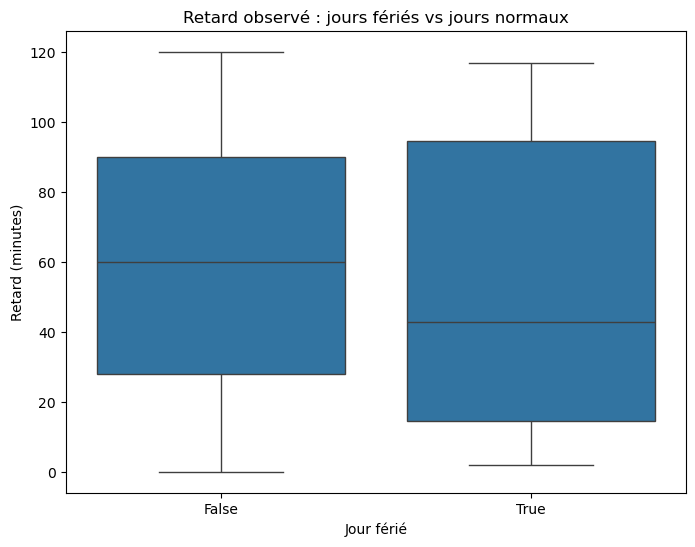

In [25]:
jours_feries = [
    "2025-01-01", "2025-05-01", "2025-07-30", "2025-08-14", "2025-08-20", 
    "2025-11-06", "2025-11-18", "2025-12-31", "2025-03-10", "2025-06-18", "2025-07-07", "2025-09-15"
]
data["Jour ferie"] = pd.to_datetime(data["Heure depart prevue"]).dt.date.isin(
    pd.to_datetime(jours_feries).date)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Jour ferie", y="Retard observe (minutes)")
plt.title("Retard observé : jours fériés vs jours normaux")
plt.xlabel("Jour férié")
plt.ylabel("Retard (minutes)")
plt.show()

In [29]:
print(data.columns)

Index(['Ville de depart', 'Ville d'arrivee', 'Distance (km)',
       'Heure depart prevue', 'Heure arrivee prevue', 'Heure arrivee reelle',
       'Poids (kg)', 'Retard observe (minutes)', 'Distance_group',
       'Duree reelle (minutes)', 'Jour de la semaine', 'Jour ferie'],
      dtype='object')


In [30]:
# Encoder les jours de la semaine en nombres
jours = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["Jour de la semaine"] = data["Jour de la semaine"].apply(lambda x: jours.index(x))

In [32]:
# Sélectionner uniquement les colonnes numériques et booléennes
numeric_data = data[["Ville de depart", "Ville d'arrivee", "Distance (km)","Retard observe (minutes)", "Poids (kg)", "Jour de la semaine", "Jour ferie", "Duree reelle (minutes)"]]

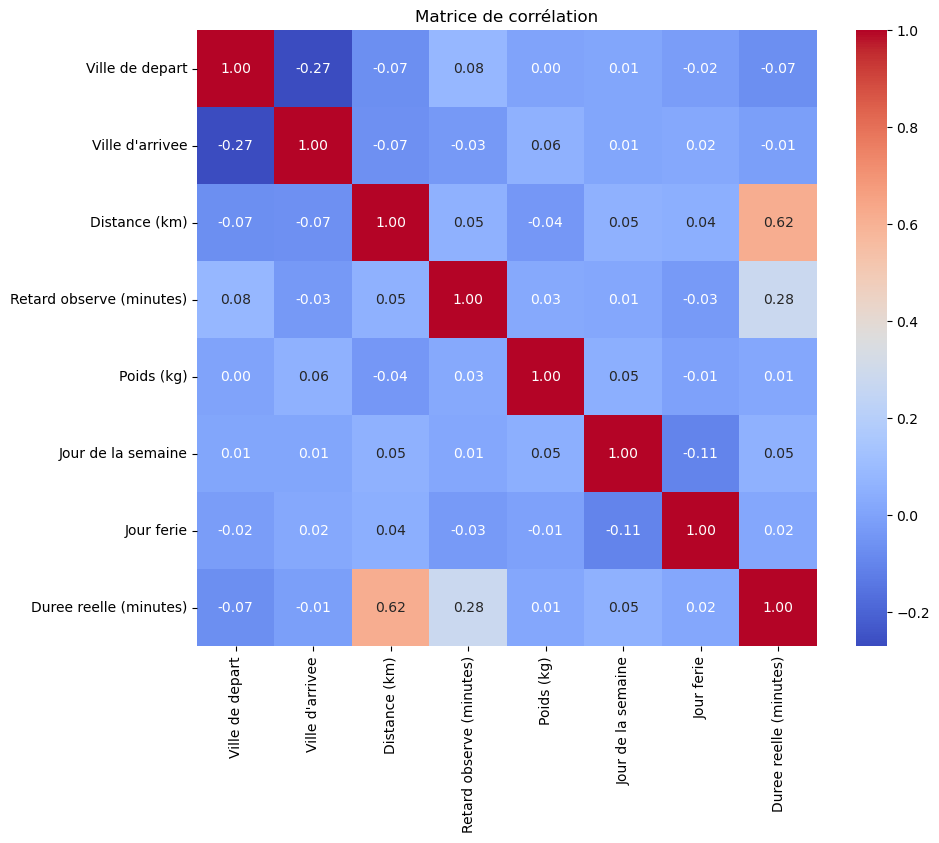

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

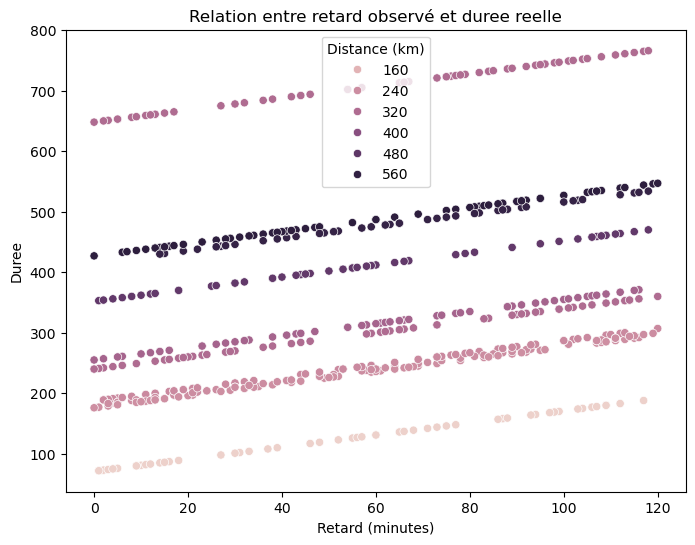

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Retard observe (minutes)", y="Duree reelle (minutes)", hue="Distance (km)")
plt.title("Relation entre retard observé et duree reelle")
plt.xlabel("Retard (minutes)")
plt.ylabel("Duree")
plt.legend(title="Distance (km)")
plt.show()

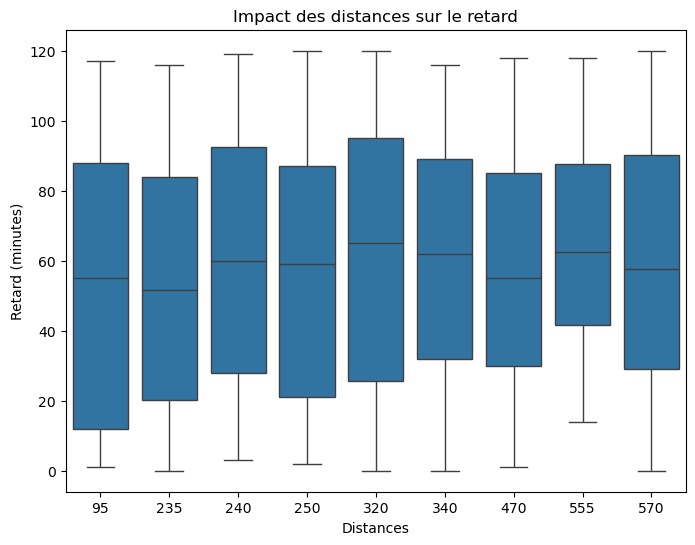

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Distance (km)", y="Retard observe (minutes)")
plt.title("Impact des distances sur le retard")
plt.xlabel("Distances")
plt.ylabel("Retard (minutes)")
plt.show()

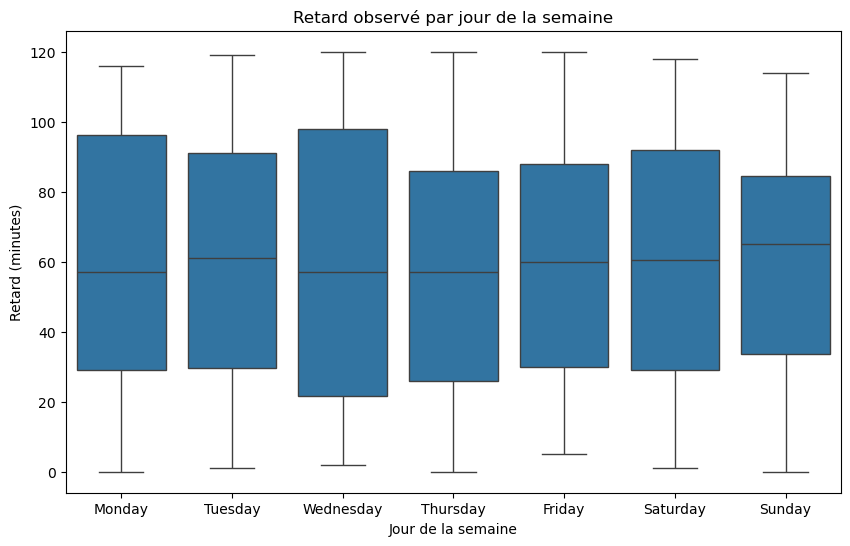

In [40]:
data["Jour de la semaine"] = pd.to_datetime(data["Heure depart prevue"]).dt.day_name()
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Jour de la semaine", y="Retard observe (minutes)", order=[
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Retard observé par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Retard (minutes)")
plt.show()

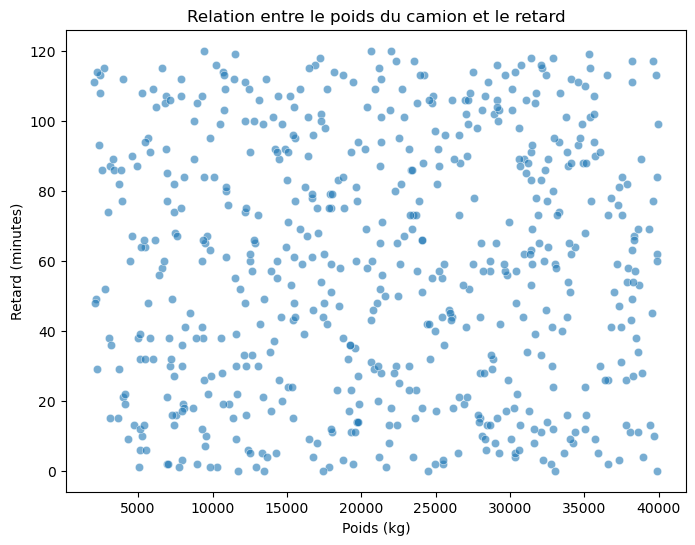

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Poids (kg)", y="Retard observe (minutes)", alpha=0.6)
plt.title("Relation entre le poids du camion et le retard")
plt.xlabel("Poids (kg)")
plt.ylabel("Retard (minutes)")
plt.show()

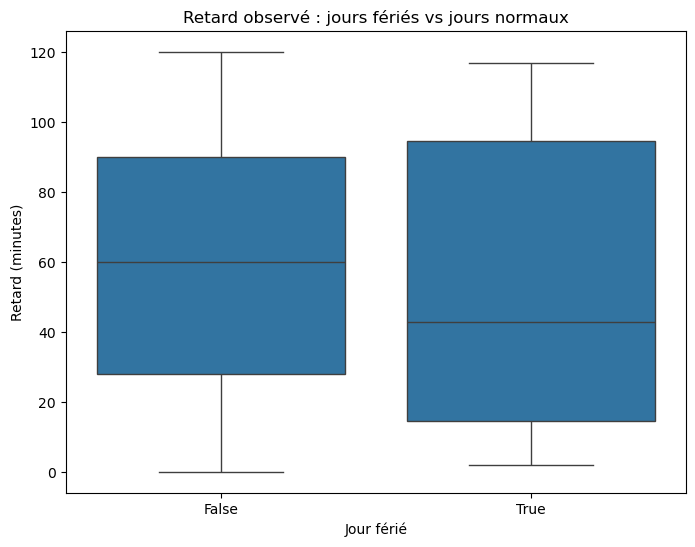

In [43]:
jours_feries = [
    "2025-01-01", "2025-05-01", "2025-07-30", "2025-08-14", "2025-08-20", 
    "2025-11-06", "2025-11-18", "2025-12-31", "2025-03-10", "2025-06-18", "2025-07-07", "2025-09-15"
]
data["Jour ferie"] = pd.to_datetime(data["Heure depart prevue"]).dt.date.isin(
    pd.to_datetime(jours_feries).date)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Jour ferie", y="Retard observe (minutes)")
plt.title("Retard observé : jours fériés vs jours normaux")
plt.xlabel("Jour férié")
plt.ylabel("Retard (minutes)")
plt.show()


### Création des caractéristiques (feature engineering)

In [48]:
# Extraire l'heure de départ et d'arrivée
data["Heure_depart"] = data["Heure depart prevue"].dt.hour
data["Heure_arrivee"] = data["Heure arrivee prevue"].dt.hour

In [51]:
# Ajouter une colonne pour indiquer si c'est un week-end
data["Weekend"] = data["Jour de la semaine"].apply(lambda x: 1 if x in [5, 6] else 0)

In [54]:
# Calculer la durée prévue en minutes
data["Duree prevue (minutes)"] = ((data["Heure arrivee prevue"] - data["Heure depart prevue"]).dt.total_seconds() / 60).astype(int)

# Ajouter une colonne pour la différence entre durée réelle et durée prévue
data["Difference duree (minutes)"] = data["Duree reelle (minutes)"] - data["Duree prevue (minutes)"]
data["Retard par rapport a la duree prevue"] = (data["Difference duree (minutes)"] > 0).astype(int)

In [56]:
# Catégoriser les distances
data["Categorie_distance"] = pd.cut(data["Distance (km)"], bins=[0, 100, 300, 1000], labels=["Courte", "Moyenne", "Longue"])

In [58]:
data["Heure_de_trafic"] = data["Heure_depart"].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

In [60]:
data["Retard_prevu"] = (data["Heure arrivee reelle"] > data["Heure arrivee prevue"]).astype(int)

In [62]:
encoder = LabelEncoder()
data["Categorie_distance"] = encoder.fit_transform(data["Categorie_distance"])

In [64]:
data.to_csv("data/donnees_preparees_retards.csv", index=False)
print("Données préparées sauvegardées dans 'donnees_preparees_retards.csv'")

Données préparées sauvegardées dans 'donnees_preparees_retards.csv'


In [66]:
data.columns

Index(['Ville de depart', 'Ville d'arrivee', 'Distance (km)',
       'Heure depart prevue', 'Heure arrivee prevue', 'Heure arrivee reelle',
       'Poids (kg)', 'Retard observe (minutes)', 'Distance_group',
       'Duree reelle (minutes)', 'Jour de la semaine', 'Jour ferie',
       'Heure_depart', 'Heure_arrivee', 'Weekend', 'Duree prevue (minutes)',
       'Difference duree (minutes)', 'Retard par rapport a la duree prevue',
       'Categorie_distance', 'Heure_de_trafic', 'Retard_prevu'],
      dtype='object')

In [78]:
data.head()

,Ville de depart,Ville d'arrivee,Distance (km),Heure depart prevue,Heure arrivee prevue,Heure arrivee reelle,Poids (kg),Retard observe (minutes),Distance_group,Duree reelle (minutes),...,Jour ferie,Heure_depart,Heure_arrivee,Weekend,Duree prevue (minutes),Difference duree (minutes),Retard par rapport a la duree prevue,Categorie_distance,Heure_de_trafic,Retard_prevu
0,1,3,95,2025-09-15 21:00:00,2025-09-15 22:11:15,2025-09-15 22:15:15,38939,4,51-100,75,...,True,21,22,0,71,4,1,0,0,1
1,0,2,235,2025-11-20 16:00:00,2025-11-20 18:56:15,2025-11-20 20:20:15,8061,84,101-300,260,...,False,16,18,0,176,84,1,2,0,1
2,3,0,570,2025-02-06 17:00:00,2025-02-07 00:07:30,2025-02-07 01:24:30,23900,77,500+,504,...,False,17,0,0,427,77,1,1,1,1
3,2,0,235,2025-02-27 16:00:00,2025-02-27 18:56:15,2025-02-27 19:45:15,38215,49,101-300,225,...,False,16,18,0,176,49,1,2,0,1
4,2,0,235,2025-08-18 19:00:00,2025-08-18 21:56:15,2025-08-18 23:43:15,6889,107,101-300,283,...,False,19,21,0,176,107,1,2,1,1
